#**Sentence Transformer**

In [1]:
!pip install -U sentence-transformers


**all-MiniLM-L6-v2**
* This is a sentence-transformers model: It maps sentences & paragraphs to a 384 dimensional dense vector space and can be used for tasks like clustering or semantic search.

In [2]:
from sentence_transformers import SentenceTransformer,util
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#**Embeddings**

In [3]:

sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.']


embeddings = model.encode(sentences)


for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.37173440e-02 -4.28515524e-02 -1.56286098e-02  1.40537424e-02
  3.95538136e-02  1.21796273e-01  2.94333436e-02 -3.17523964e-02
  3.54959816e-02 -7.93140158e-02  1.75878443e-02 -4.04369906e-02
  4.97259386e-02  2.54911911e-02 -7.18700886e-02  8.14969018e-02
  1.47071364e-03  4.79626842e-02 -4.50336263e-02 -9.92174745e-02
 -2.81770118e-02  6.45046607e-02  4.44670692e-02 -4.76217195e-02
 -3.52952518e-02  4.38671783e-02 -5.28566279e-02  4.33054753e-04
  1.01921476e-01  1.64072346e-02  3.26996781e-02 -3.45987007e-02
  1.21339252e-02  7.94871002e-02  4.58342349e-03  1.57778263e-02
 -9.68209095e-03  2.87626106e-02 -5.05806133e-02 -1.55793801e-02
 -2.87906900e-02 -9.62282531e-03  3.15556824e-02  2.27349177e-02
  8.71449634e-02 -3.85027453e-02 -8.84718448e-02 -8.75500590e-03
 -2.12342944e-02  2.08923575e-02 -9.02077258e-02 -5.25732450e-02
 -1.05638755e-02  2.88310610e-02 -1.61455031e-02  6.17836649e-03
 -1.23234

#**Cos Similarity**

In [ ]:
emb1 = model.encode("I am eating Apple")
emb2 = model.encode("I like fruits")
cos_sim = util.cos_sim(emb1, emb2)
print("Cosine-Similarity:", cos_sim)

Cosine-Similarity: tensor([[0.5398]])


##**Testing similairty between some se of pairs**

In [ ]:
# Compute cosine similarity between all pairs

sentences = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.'
          ]

#Encode all sentences
embeddings = model.encode(sentences)

#Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)

cos_sim

tensor([[ 1.0000,  0.7553, -0.1050,  0.2474, -0.0704, -0.0333,  0.1707,  0.0476,
          0.0630],
        [ 0.7553,  1.0000, -0.0610,  0.1442, -0.0809, -0.0216,  0.1157,  0.0362,
          0.0216],
        [-0.1050, -0.0610,  1.0000, -0.1088,  0.0217, -0.0413, -0.0928,  0.0231,
          0.0247],
        [ 0.2474,  0.1442, -0.1088,  1.0000, -0.0348,  0.0362,  0.7369,  0.0821,
          0.1389],
        [-0.0704, -0.0809,  0.0217, -0.0348,  1.0000, -0.1654, -0.0592,  0.1961,
          0.2564],
        [-0.0333, -0.0216, -0.0413,  0.0362, -0.1654,  1.0000,  0.0769, -0.0380,
         -0.0895],
        [ 0.1707,  0.1157, -0.0928,  0.7369, -0.0592,  0.0769,  1.0000,  0.0495,
          0.1191],
        [ 0.0476,  0.0362,  0.0231,  0.0821,  0.1961, -0.0380,  0.0495,  1.0000,
          0.6433],
        [ 0.0630,  0.0216,  0.0247,  0.1389,  0.2564, -0.0895,  0.1191,  0.6433,
          1.0000]])

here : matrix where the 1st sentence represent the first row and each element of the 1st row represent cosine similarity with the other senetnces


In [ ]:
#Add all pairs to a list with their cosine similarity score
all_sentence_combinations = []
for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_sentence_combinations.append((cos_sim[i][j], i, j))
all_sentence_combinations

[(tensor(0.7553), 0, 1),
 (tensor(-0.1050), 0, 2),
 (tensor(0.2474), 0, 3),
 (tensor(-0.0704), 0, 4),
 (tensor(-0.0333), 0, 5),
 (tensor(0.1707), 0, 6),
 (tensor(0.0476), 0, 7),
 (tensor(0.0630), 0, 8),
 (tensor(-0.0610), 1, 2),
 (tensor(0.1442), 1, 3),
 (tensor(-0.0809), 1, 4),
 (tensor(-0.0216), 1, 5),
 (tensor(0.1157), 1, 6),
 (tensor(0.0362), 1, 7),
 (tensor(0.0216), 1, 8),
 (tensor(-0.1088), 2, 3),
 (tensor(0.0217), 2, 4),
 (tensor(-0.0413), 2, 5),
 (tensor(-0.0928), 2, 6),
 (tensor(0.0231), 2, 7),
 (tensor(0.0247), 2, 8),
 (tensor(-0.0348), 3, 4),
 (tensor(0.0362), 3, 5),
 (tensor(0.7369), 3, 6),
 (tensor(0.0821), 3, 7),
 (tensor(0.1389), 3, 8),
 (tensor(-0.1654), 4, 5),
 (tensor(-0.0592), 4, 6),
 (tensor(0.1961), 4, 7),
 (tensor(0.2564), 4, 8),
 (tensor(0.0769), 5, 6),
 (tensor(-0.0380), 5, 7),
 (tensor(-0.0895), 5, 8),
 (tensor(0.0495), 6, 7),
 (tensor(0.1191), 6, 8),
 (tensor(0.6433), 7, 8)]

In [ ]:
#Sort list by the highest cosine similarity score
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

print("Top-5 most similar pairs:")
for score, i, j in all_sentence_combinations[0:5]:
    print("{} \t {} \t {:.4f}".format(sentences[i], sentences[j], cos_sim[i][j]))

Top-5 most similar pairs:
A man is eating food. 	 A man is eating a piece of bread. 	 0.7553
A man is riding a horse. 	 A man is riding a white horse on an enclosed ground. 	 0.7369
A monkey is playing drums. 	 Someone in a gorilla costume is playing a set of drums. 	 0.6433
A woman is playing violin. 	 Someone in a gorilla costume is playing a set of drums. 	 0.2564
A man is eating food. 	 A man is riding a horse. 	 0.2474


#**Semantic Search**

In [ ]:
question = "How many models can I host on HuggingFace?"
answer_1 = "All plans come with unlimited private models and datasets."
answer_2 = "AutoNLP is an automatic way to train and deploy state-of-the-art NLP models, seamlessly integrated with the Hugging Face ecosystem."
answer_3 = "Based on how much training data and model variants are created, we send you a compute cost and payment link - as low as $10 per job."

query_embedding = model.encode(question)
corpus_embeddings = model.encode([answer_1, answer_2, answer_3])



**util.semantic_search**

This function performs a cosine similarity search between a list of query embeddings
and a list of corpus embeddings. It can be used for Information Retrieval / Semantic
Search for corpora up to about 1 Million entries.

Parameters:
- `query_embeddings` (Tensor): A 2-dimensional tensor with the query embeddings.
- `corpus_embeddings` (Tensor): A 2-dimensional tensor with the corpus embeddings.
- `query_chunk_size` (int, optional): Process 100 queries simultaneously.
  Increasing that value increases the speed but requires more memory. Defaults to 100.
- `corpus_chunk_size` (int, optional): Scans the corpus 100k entries at a time.
  Increasing that value increases the speed but requires more memory. Defaults to 500000.
- `top_k` (int, optional): Retrieve top k matching entries. Defaults to 10.
- `score_function` (Callable[[Tensor, Tensor], Tensor], optional):
  Function for computing scores. By default, cosine similarity.




In [ ]:
print(util.semantic_search(query_embedding, corpus_embeddings))

[[{'corpus_id': 0, 'score': 0.35359805822372437}, {'corpus_id': 1, 'score': 0.31435173749923706}, {'corpus_id': 2, 'score': 0.24975529313087463}]]


In [ ]:
#using a hugging face pipeline to take the semantically related context exctracted and do QA
from transformers import pipeline

qa_model = pipeline("question-answering")
question = "How many models can I host on HuggingFace?"
context = "All plans come with unlimited private models and datasets." #highest retrived query
qa_model(question = question, context = context)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


{'score': 0.701718270778656, 'start': 20, 'end': 29, 'answer': 'unlimited'}

#**Experiements2**

In [1]:
a = "purple is the best city in the forest"
b = "there is an art to getting your way and throwing bananas on to the street is not it"  # this is very similar to 'g'
c = "it is not often you find soggy bananas on the street"
d = "green should have smelled more tranquil but somehow it just tasted rotten"
e = "joyce enjoyed eating pancakes with ketchup"
f = "as the asteroid hurtled toward earth becky was upset her dentist appointment had been canceled"
g = "to get your way you must not bombard the road with yellow fruit"  # this is very similar to 'b'

In [2]:
from sentence_transformers import SentenceTransformer,util
model = SentenceTransformer('bert-base-nli-mean-tokens')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
docs_embeddings = model.encode([a, b, c, d, e, f, g], convert_to_tensor=True)

In [5]:
docs_embeddings.shape

torch.Size([7, 768])

In [7]:
cos_sim = util.cos_sim(docs_embeddings, docs_embeddings)


In [8]:
cos_sim

tensor([[ 1.0000,  0.1869,  0.2830,  0.2963,  0.2745,  0.1018,  0.2170],
        [ 0.1869,  1.0000,  0.7206,  0.5143,  0.1175,  0.1931,  0.6618],
        [ 0.2830,  0.7206,  1.0000,  0.4886,  0.2357,  0.1716,  0.5599],
        [ 0.2963,  0.5143,  0.4886,  1.0000,  0.2699,  0.3789,  0.5239],
        [ 0.2745,  0.1175,  0.2357,  0.2699,  1.0000,  0.2342, -0.0160],
        [ 0.1018,  0.1931,  0.1716,  0.3789,  0.2342,  1.0000,  0.2232],
        [ 0.2170,  0.6618,  0.5599,  0.5239, -0.0160,  0.2232,  1.0000]])

<Axes: >

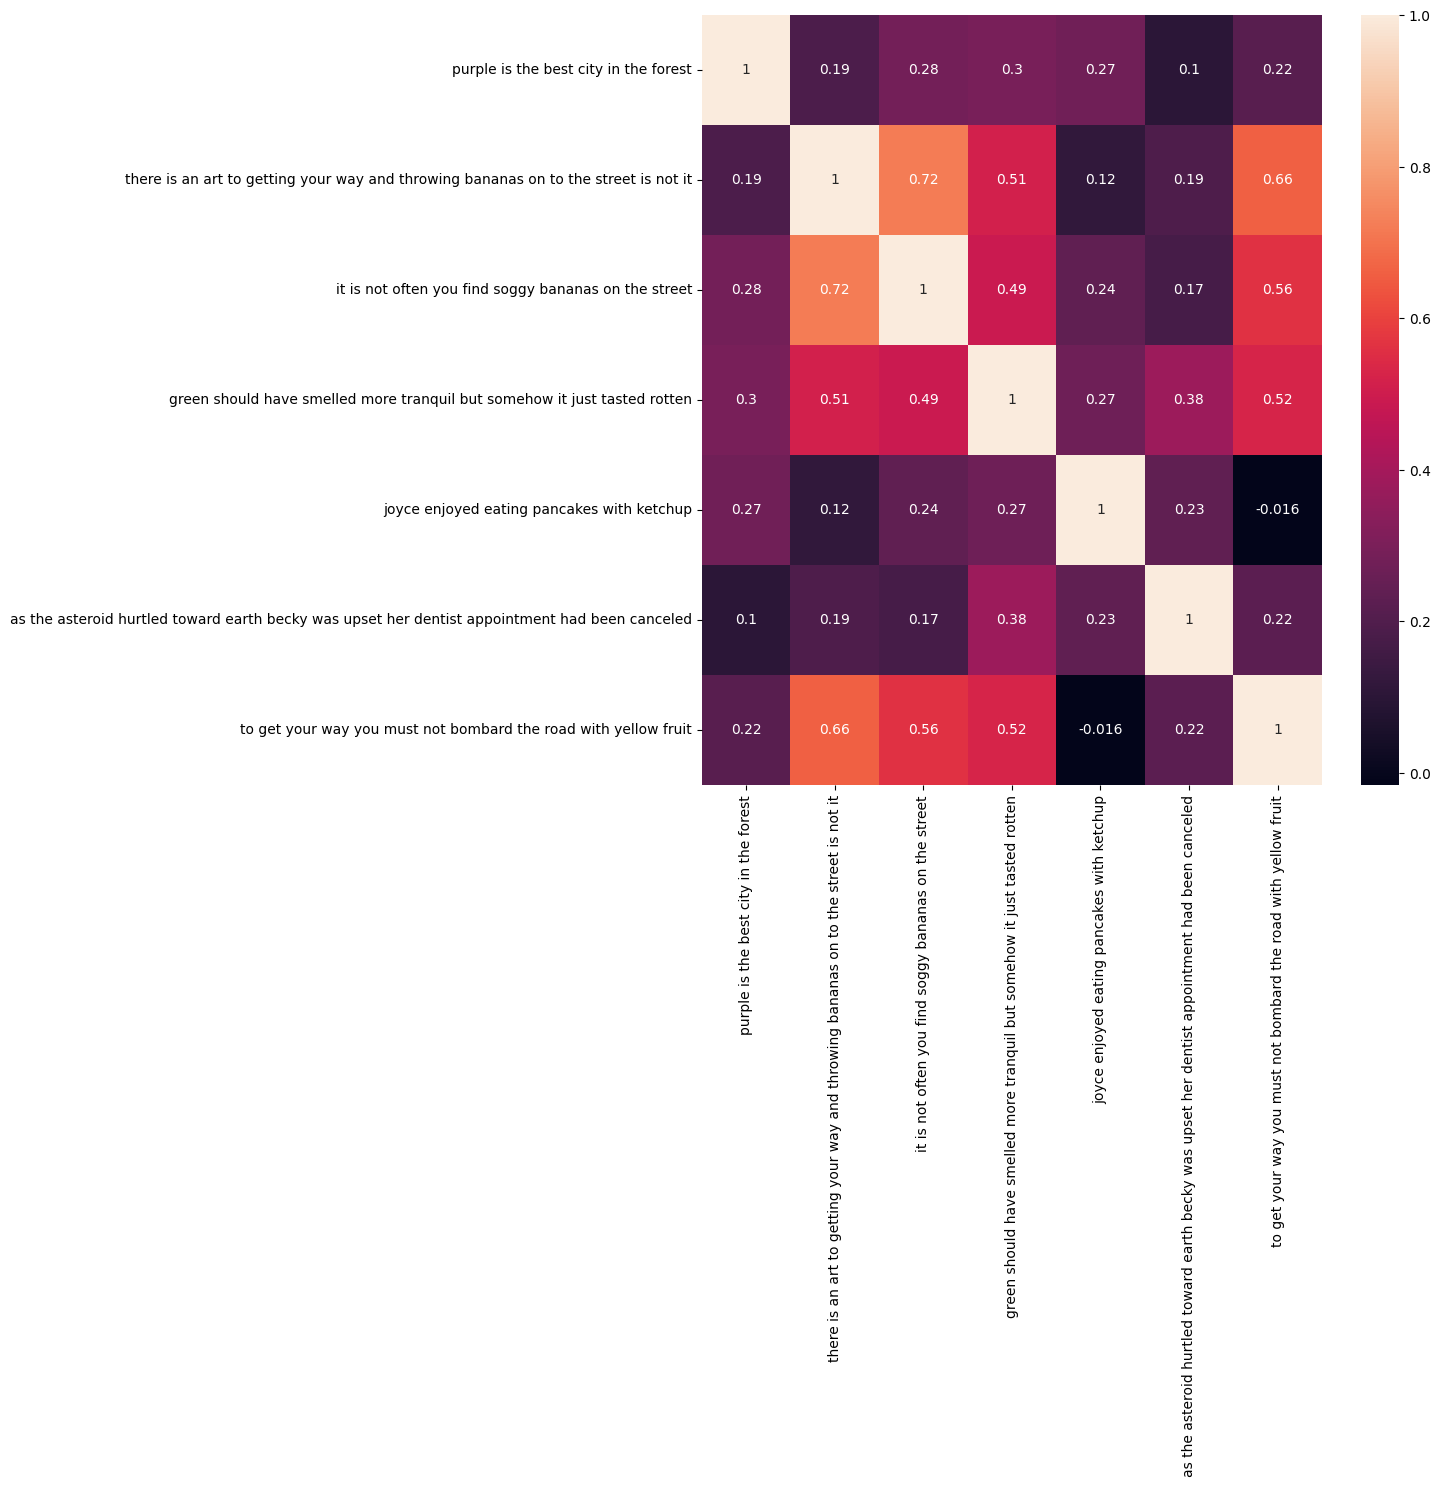

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
labels = [a, b, c, d, e, f, g]
sns.heatmap(cos_sim, xticklabels=labels, yticklabels=labels, annot =True)

# References

"""
1. **Semantic Search with Sentence-Transformers**:  
   For a complete guide and examples of semantic search using Sentence-Transformers,
   visit the official documentation here:
   [Semantic Search Guide](https://www.sbert.net/examples/applications/semantic-search/README.html)

2. **all-mini-v2 Embedding Model**:  
   The all-mini-v2 embedding model is designed for efficient sentence embeddings.
   You can find more information and download it from the Hugging Face model hub:
   [all-mini-v2 on Hugging Face](https://huggingface.co/sentence-transformers/all-mini-v2)
"""
